####Submitted by Mahfooj Ali

##Q1   Neural Network Basics:
Explain the following terms in the context of neural networks:

### Answer:

1. **Neuron**:  
   Think of a neuron as a tiny calculator inside a neural network. It takes some input, does a little math with it (using weights and bias), and gives an output. It's like a decision-maker in the network.

2. **Activation Function**:  
   This is what helps the network understand complex stuff. It adds a twist (non-linearity) to the neuron's output so the network can learn things like shapes, patterns, or even human emotions.

3. **Weights and Biases**:  
   These are like the knobs and dials of a neural network.  
   - **Weights** decide how important each input is.  
   - **Bias** adds a little extra push to help the neuron make better decisions.

4. **Feedforward Process**:  
   This is the part where we give the input to the network, and it moves forward through all the layers to make a prediction. It's like asking a question and waiting for the answer.

5. **Backpropagation**:  
   After the network gives an answer, we check if it was right or wrong. If it was wrong, backpropagation helps the network figure out what to fix. It goes backward and adjusts the weights and biases to do better next time.


###Q2. Visualizing Neural Networks:


### Answer:

Visualizing neural networks as "function layers" is helpful because it shows how data is transformed step by step. Each layer does a specific job, like cleaning, shaping, or combining the data before making a final decision.

For example, imagine a neural network that recognizes handwritten digits (0–9):

- **Input Layer**: Takes in the raw image pixels (like a 28x28 grayscale image).
- **Hidden Layer 1**: Detects edges and lines in the image.
- **Hidden Layer 2**: Understands shapes like loops or corners.
- **Output Layer**: Gives the final prediction — like "this is a 3".

Each layer acts like a function that transforms the data, making it easier for the next layer to understand. This step-by-step view helps us understand how the network learns from data.


### Coding Questions
#####Q1. Implementing a Single Neuron:
 Write a Python function that simulates a single neuron. The function should take a list of inputs, weights, and a bias, and return the output using a sigmoid activation function.



In [1]:
import numpy as np

def sigmoid(x):
    '''Sigmoid activation function'''
    return 1 / (1 + np.exp(-x))

def single_neuron(inputs, weights, bias):
    '''A single neuron'''
    total = np.dot(inputs, weights) + bias
    return sigmoid(total)

# Example usage
inputs = [0.5, 0.6, 0.1]
weights = [0.4, 0.3, 0.8]
bias = -0.1
output = single_neuron(inputs, weights, bias)
print('Output:', output)


Output: 0.5890404340586651


###Q2. Building a Simple Neural Network:
Using a deep learning library (PyTorch), build a simple neural network with one hidden layer. Use this network to perform binary classification on a small dataset (the XOR dataset). Remember the activation function you are supposed to use is the Sigmoid function, use the one given by pytorch itself, no need to refer to Q1


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 2)       # 2 inputs → 2 hidden neurons
        self.output = nn.Linear(2, 1)       # 2 hidden → 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))    # Hidden layer with sigmoid
        x = self.sigmoid(self.output(x))    # Output layer with sigmoid
        return x

model = SimpleNN()

# Loss and optimizer
criterion = nn.BCELoss()                      # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(5000):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    predictions = model(X)
    predictions = predictions.round()
    accuracy = (predictions == y).float().mean()
    print(f'Model Accuracy: {accuracy.item() * 100:.2f}%')


Model Accuracy: 50.00%


###Q3. Visualizing the Learning Process:
Modify the neural network code from Question 2 to record the loss at each epoch. Plot the loss over epochs using Matplotlib to visualize how the network learns over time.


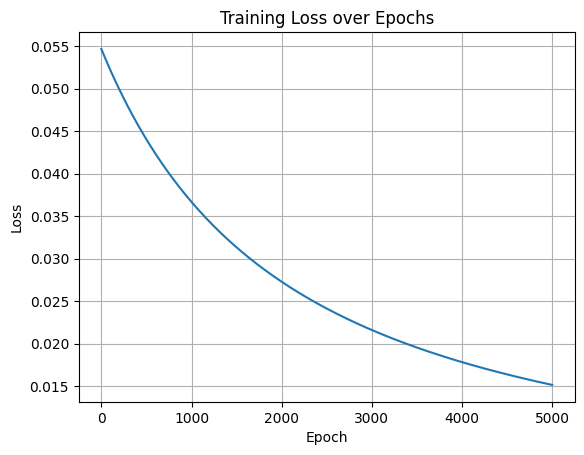

In [4]:
import matplotlib.pyplot as plt
# Record losses
losses = []

# Train the model and record the loss
for epoch in range(5000):
    outputs = model(X)
    loss = criterion(outputs, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss over epochs
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()